### Our Mission

In this lesson you gained some insight into a number of techniques used to understand how well our model is performing.  This notebook is aimed at giving you some practice with the metrics specifically related to classification problems.  With that in mind, we will again be looking at the spam dataset from the earlier lessons.

First, run the cell below to prepare the data and instantiate a number of different models.

In [8]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_table('Data/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

In [12]:
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
# Make predictions using each of your models
preds_nb = naive_bayes.predict(testing_data)
pg_pred = bag_mod.predict(testing_data)
rf_pred = rf_mod.predict(testing_data)
ada_pred = ada_mod.predict(testing_data)
svm_pred = svm_mod.predict(testing_data)

Now that you have set up all your predictions, let's get to topics addressed in this lesson - measuring how well each of your models performed. First, we will focus on how each metric was calculated for a single model, and then in the final part of this notebook, you will choose models that are best based on a particular metric.

You will be writing functions to calculate a number of metrics and then comparing the values to what you get from sklearn.  This will help you build intuition for how each metric is calculated.

> **Step 3**: As an example of how this will work for the upcoming questions, run the cell below.  Fill in the below function to calculate accuracy, and then compare your answer to the built in to assure you are correct.

In [26]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)

print("naive_bayes{}".format(len(y_test)))
print("naive_bayes{}".format(preds_nb.size))

print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("bag_mod")
print(accuracy(y_test, pg_pred))
print(accuracy_score(y_test, pg_pred))
print("rf_mod")
print(accuracy(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))
print("ada_mod")
print(accuracy(y_test, ada_pred))
print(accuracy_score(y_test, ada_pred))
print("svm_mod")
print(accuracy(y_test, svm_pred))
print(accuracy_score(y_test, svm_pred))

print("Since these match, we correctly calculated our metric!")

naive_bayes1393
naive_bayes1393
0.9885139985642498
0.9885139985642498
bag_mod
0.9741564967695621
0.9741564967695621
rf_mod
0.9827709978463748
0.9827709978463748
ada_mod
0.9770279971284996
0.9770279971284996
svm_mod
0.9849246231155779
0.9849246231155779
Since these match, we correctly calculated our metric!


In [55]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    preds_pos = (preds==1).sum()
    
    return tp/preds_pos


print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("bag_mod")
print(precision(y_test, pg_pred))
print(precision_score(y_test, pg_pred))
print("rf_mod")
print(precision(y_test, rf_pred))
print(precision_score(y_test, rf_pred))
print("ada_mod")
print(precision(y_test, ada_pred))
print(precision_score(y_test, ada_pred))
print("svm_mod")
print(precision(y_test, svm_pred))
print(precision_score(y_test, svm_pred))
print("If the above match, you got it!")

0.9720670391061452
0.9720670391061452
bag_mod
0.9116022099447514
0.9116022099447514
rf_mod
1.0
1.0
ada_mod
0.9693251533742331
0.9693251533742331
svm_mod
0.9939759036144579
0.9939759036144579
If the above match, you got it!


> **Step 5**: Fill in the below function to calculate recall, and then compare your answer to the built in to assure you are correct.

In [56]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    all_p = (actual==1).sum()
    return tp/all_p


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("bag_mod")
print(recall(y_test, pg_pred))
print(recall_score(y_test, pg_pred))
print("rf_mod")
print(recall(y_test, rf_pred))
print(recall_score(y_test, rf_pred))
print("ada_mod")
print(recall(y_test, ada_pred))
print(recall_score(y_test, ada_pred))
print("svm_mod")
print(recall(y_test, svm_pred))
print(recall_score(y_test, svm_pred))
print("If the above match, you got it!")

0.9405405405405406
0.9405405405405406
bag_mod
0.8918918918918919
0.8918918918918919
rf_mod
0.8702702702702703
0.8702702702702703
ada_mod
0.8540540540540541
0.8540540540540541
svm_mod
0.8918918918918919
0.8918918918918919
If the above match, you got it!


> **Step 6**: Fill in the below function to calculate f1-score, and then compare your answer to the built in to assure you are correct.

In [57]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    p = precision(preds, actual)
    r = recall(preds, actual)
    
    return 2*((p*r)/(p+r))


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("bag_mod")
print(f1(y_test, pg_pred))
print(f1_score(y_test, pg_pred))
print("rf_mod")
print(f1(y_test, rf_pred))
print(f1_score(y_test, rf_pred))
print("ada_mod")
print(f1(y_test, ada_pred))
print(f1_score(y_test, ada_pred))
print("svm_mod")
print(f1(y_test, svm_pred))
print(f1_score(y_test, svm_pred))
print("If the above match, you got it!")

0.9560439560439562
0.9560439560439562
bag_mod
0.9016393442622951
0.9016393442622951
rf_mod
0.930635838150289
0.930635838150289
ada_mod
0.9080459770114943
0.9080459770114943
svm_mod
0.9401709401709402
0.9401709401709402
If the above match, you got it!


As a final step in this workbook, let's take a look at the last three metrics you saw, f-beta scores, ROC curves, and AUC.

**For f-beta scores:** If you decide that you care more about precision, you should move beta closer to 0.  If you decide you care more about recall, you should move beta towards infinity. 

> **Step 9:** Using the fbeta_score works similar to most of the other metrics in sklearn, but you also need to set beta as your weighting between precision and recall.  Use the space below to show that you can use [fbeta in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) to replicate your f1-score from above.  If in the future you want to use a different weighting, [this article](http://mlwiki.org/index.php/Precision_and_Recall) does an amazing job of explaining how you might adjust beta for different situations.

F_beta Score equation:
$$F_\beta SCORE = (1+\beta^2)\frac{precision * Recall}{\beta^2 * Precision + Recall}$$

In [65]:
from sklearn.metrics import fbeta_score

def fbeta(preds, actual, beta):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    p = precision(preds, actual)
    r = recall(preds, actual)
    
    return (1 + (beta**2))*((p*r)/((beta**2)*p+r))

print(fbeta(y_test, preds_nb, 3))
print(fbeta_score(y_test, preds_nb, beta = 3))

0.9436008676789588
0.9436008676789588


> **Step 10:** Building ROC curves in python is a pretty involved process on your own.  I wrote the function below to assist with the process and make it easier for you to do so in the future as well.  Try it out using one of the other classifiers you created above to see how it compares to the random forest model below.

Run the cell below to build a ROC curve, and retrieve the AUC for the random forest model.

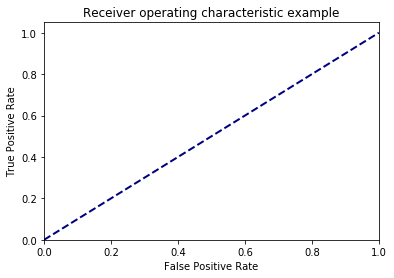

0.9243243243243243

In [67]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    #Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test) 